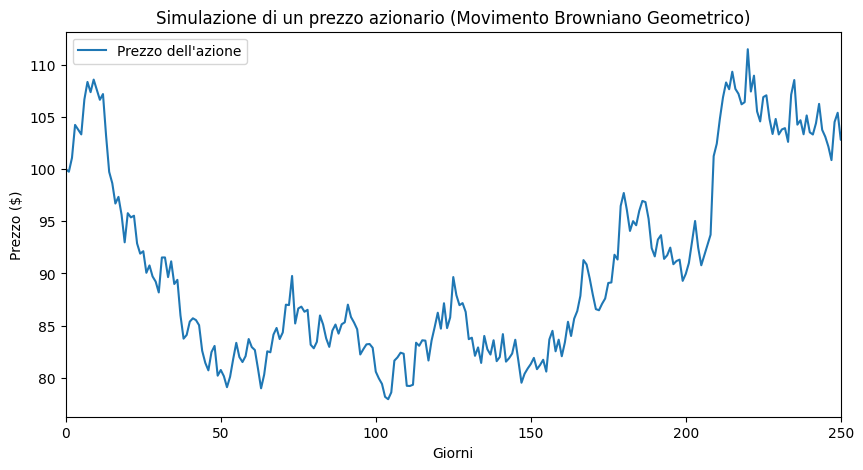

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della simulazione
np.random.seed(42)
T = 252  # Giorni di trading in un anno
mu = 0.0005  # Rendimento medio giornaliero
sigma = 0.02  # Volatilità giornaliera
S0 = 100  # Prezzo iniziale dell'azione

# Simuliamo il movimento browniano
dt = 1
epsilon = np.random.normal(0, 1, T)
S = np.zeros(T)
S[0] = S0

for t in range(1, T):
    S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * epsilon[t])

# Plot della simulazione
plt.figure(figsize=(10, 5))
plt.plot(S, label="Prezzo dell'azione")
plt.xlim((0, 250))
plt.xlabel("Giorni")
plt.ylabel("Prezzo ($)")
plt.title("Simulazione di un prezzo azionario (Movimento Browniano Geometrico)")
plt.legend()
plt.show()

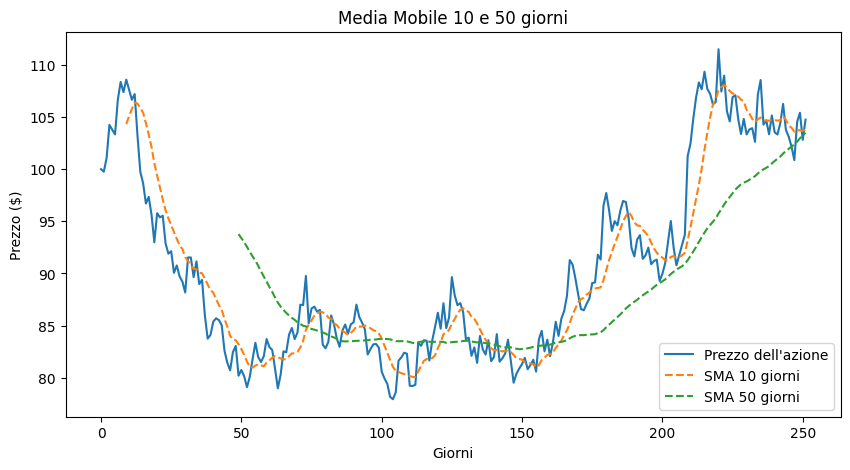

In [15]:
# Calcolo della SMA 10 e 50
N1, N2 = 10, 50
SMA10 = np.convolve(S, np.ones(N1)/N1, mode='valid')
SMA50 = np.convolve(S, np.ones(N2)/N2, mode='valid')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(S, label="Prezzo dell'azione")
plt.plot(range(N1-1, len(S)), SMA10, label=f"SMA {N1} giorni", linestyle="dashed")
plt.plot(range(N2-1, len(S)), SMA50, label=f"SMA {N2} giorni", linestyle="dashed")
plt.xlabel("Giorni")
plt.ylabel("Prezzo ($)")
plt.title(f"Media Mobile {N1} e {N2} giorni")
plt.legend()
plt.show()

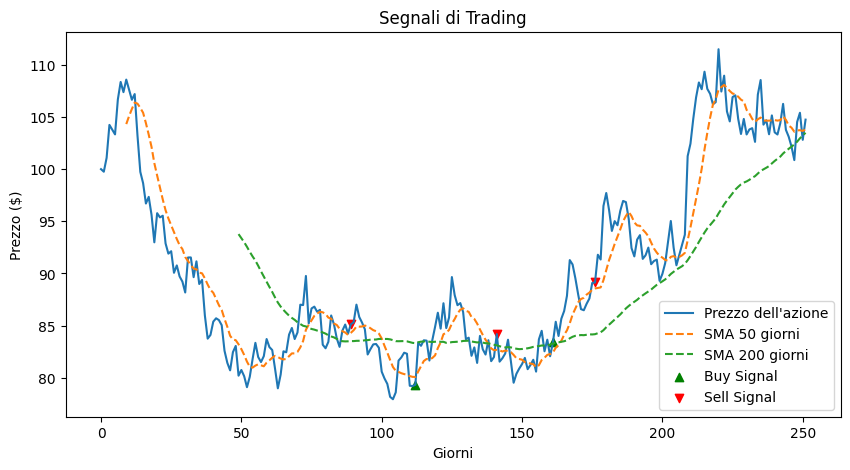

In [19]:
signals = np.zeros(len(S) - (N2-1))  # Array di segnali (0 = nessuna azione)

for i in range(1, min(len(SMA10), len(SMA50))):
    if SMA10[i] > SMA50[i] and SMA10[i-1] <= SMA50[i-1]:
        signals[i] = 1  # Compra
    elif SMA10[i] < SMA50[i] and SMA10[i-1] >= SMA50[i-1]:
        signals[i] = -1  # Vendi

# Plot dei segnali
plt.figure(figsize=(10, 5))
plt.plot(S, label="Prezzo dell'azione")
plt.plot(range(N1-1, len(S)), SMA10, label="SMA 50 giorni", linestyle="dashed")
plt.plot(range(N2-1, len(S)), SMA50, label="SMA 200 giorni", linestyle="dashed")
plt.scatter(np.where(signals == 1)[0] + (N2-1), S[np.where(signals == 1)[0] + (N2-1)], marker="^", color="g", label="Buy Signal", alpha=1)
plt.scatter(np.where(signals == -1)[0] + (N2-1), S[np.where(signals == -1)[0] + (N2-1)], marker="v", color="r", label="Sell Signal", alpha=1)
plt.xlabel("Giorni")
plt.ylabel("Prezzo ($)")
plt.title("Segnali di Trading")
plt.legend()
plt.show()

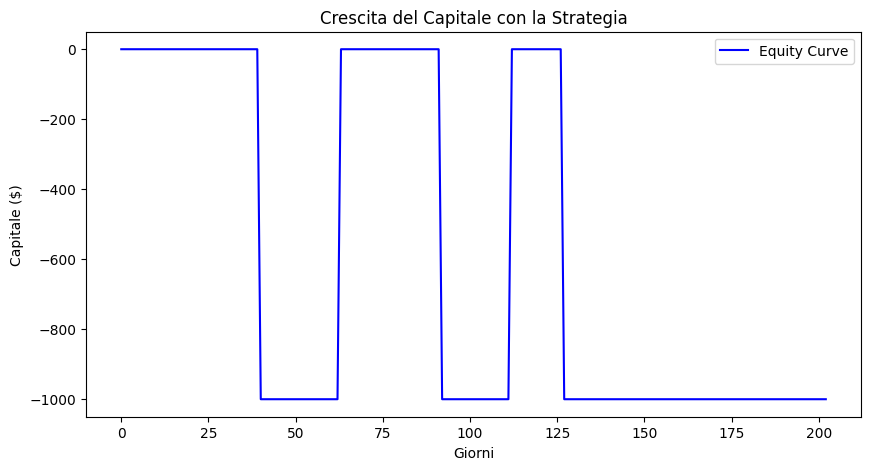

In [20]:
capital = 10000  # Capitale iniziale
positions = capital * (signals * 0.1)  # Investiamo il 10% ad ogni trade
portfolio = np.cumsum(positions)

# Plot dei guadagni
plt.figure(figsize=(10, 5))
plt.plot(portfolio, label="Equity Curve", color="b")
plt.xlabel("Giorni")
plt.ylabel("Capitale ($)")
plt.title("Crescita del Capitale con la Strategia")
plt.legend()
plt.show()